<a href="https://colab.research.google.com/github/Sarah060108/BRAIN-TUMOR-DETECTION-USING-KMEANS-SGLDM-AND-RESNET50/blob/main/final_journal_code_kmeans%2B%2B%2Csgldm%2Cresnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import necessary libraries
import os
import cv2
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.cluster import KMeans
from skimage.feature import greycomatrix, greycoprops
%matplotlib inline
from IPython import display
import os
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import *
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.applications.vgg19 import VGG19, preprocess_input
import shutil
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
import imutils


np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
!apt-get install tree
#clear_output()
# create new folders
!mkdir TRAIN TEST VAL TRAIN/YES TRAIN/NO TEST/YES TEST/NO VAL/YES VAL/NO
!tree -d

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 43.0 kB of archives.
After this operation, 115 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tree amd64 1.8.0-1 [43.0 kB]
Fetched 43.0 kB in 1s (33.4 kB/s)
Selecting previously unselected package tree.
(Reading database ... 122349 files and directories currently installed.)
Preparing to unpack .../tree_1.8.0-1_amd64.deb ...
Unpacking tree (1.8.0-1) ...
Setting up tree (1.8.0-1) ...
Processing triggers for man-db (2.9.1-1) ...
.
├── drive
│   └── MyDrive
│       ├── Brain_MRI
│       │   ├── TCGA_CS_4941_19960909
│       │   ├── TCGA_CS_4942_19970222
│       │   ├── TCGA_CS_4943_20000902
│       │   ├── TCGA_CS_4944_20010208
│       │   ├── TCGA_CS_5393_19990606
│       │   ├── TCGA_CS_5395_19981004
│       │  

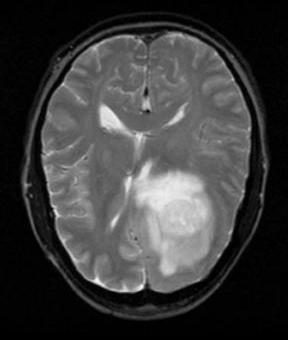

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image from file
img_path = '/content/drive/MyDrive/bt dataset final/yes/y122.jpg'
img = cv2.imread(img_path)

# Display the image in a window
cv2_imshow(img)



In [ ]:
# Define constants
IMG_SIZE = 224
BATCH_SIZE = 32
NUM_CLASSES = 2
NUM_EPOCHS = 25

In [ ]:
def load_data(dir_path, img_size):

    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [ ]:
DIR = '/content/drive/MyDrive/bt dataset final/'

In [ ]:
# Load data
DIR = '/content/drive/MyDrive/bt dataset final/'
X, y, labels = load_data(DIR, IMG_SIZE)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

100%|██████████| 4/4 [00:13<00:00,  3.49s/it]

802 images loaded from /content/drive/MyDrive/bt dataset final/ directory.



<ipython-input-4-92d4c8a61dac>:19: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
print("Number of training images:", X_train.shape[0])
print("Number of testing images:", X_test.shape[0])


Number of training images: 561
Number of testing images: 241


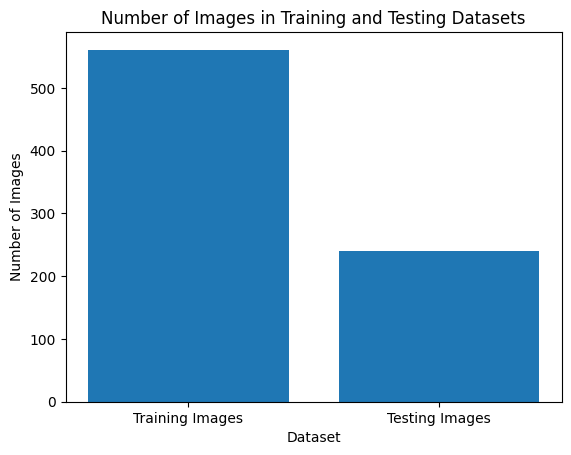

In [ ]:
import matplotlib.pyplot as plt

# Define the data
train_images = X_train.shape[0]
test_images = X_test.shape[0]
labels = ["Training Images", "Testing Images"]
values = [train_images, test_images]

# Create the bar chart
plt.bar(labels, values)

# Add labels and title
plt.xlabel("Dataset")
plt.ylabel("Number of Images")
plt.title("Number of Images in Training and Testing Datasets")

# Show the chart
plt.show()


In [ ]:
# Load data
DIR = '/content/drive/MyDrive/bt dataset final/'
X, y, labels = load_data(DIR, IMG_SIZE)

# Split data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Save the training and testing sets to disk
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.save('y_test.npy', y_test)

100%|██████████| 4/4 [00:06<00:00,  1.56s/it]
<ipython-input-5-92d4c8a61dac>:19: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



802 images loaded from /content/drive/MyDrive/bt dataset final/ directory.


In [ ]:
import numpy as np

y_train = np.load('y_train.npy', allow_pickle=True)
y_test = np.load('y_test.npy', allow_pickle=True)


In [ ]:
X, y, labels = load_data(DIR, IMG_SIZE)

100%|██████████| 4/4 [00:03<00:00,  1.18it/s]

802 images loaded from /content/drive/MyDrive/bt dataset final/ directory.



<ipython-input-5-92d4c8a61dac>:19: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
def crop_imgs(set_name, add_pixels_value=0):
    """
    Finds the extreme points on the image and crops the rectangular out of them
    """
    set_new = []
    for img in set_name:
        gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        # threshold the image, then perform a series of erosions +
        # dilations to remove any small regions of noise
        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        # find contours in thresholded image, then grab the largest one
        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        # find the extreme points
        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()
        set_new.append(new_img)

    return np.array(set_new)

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y103.jpg')

# Resize the image
IMG_SIZE = (640, 480)
img = cv2.resize(img, IMG_SIZE, interpolation=cv2.INTER_CUBIC)

# Convert to grayscale and apply Gaussian blur
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image and perform erosion and dilation
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# Find the largest contour and its extreme points
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
c = max(cnts, key=cv2.contourArea)
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])
extBot = tuple(c[c[:, :, 1].argmax()][0])

# Crop the image
ADD_PIXELS = 0
new_img = img[extTop[1]-ADD_PIXELS:extBot[1]+ADD_PIXELS, extLeft[0]-ADD_PIXELS:extRight[0]+ADD_PIXELS].copy()





In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

# Read the image from file and resize it
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y103.jpg')
img = cv2.resize(
            img,
            dsize=(256, 256),
            interpolation=cv2.INTER_CUBIC
        )

# Convert the image to grayscale and apply Gaussian blur filter
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

# Threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# Find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# Find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])


In [ ]:
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y103.jpg')

# Apply Gaussian blur filter
blurred_img = cv2.GaussianBlur(img, (5, 5), 0)

# Set up the figure
fig = plt.figure(figsize=(15,6))



<Figure size 1500x600 with 0 Axes>

NameError: ignored

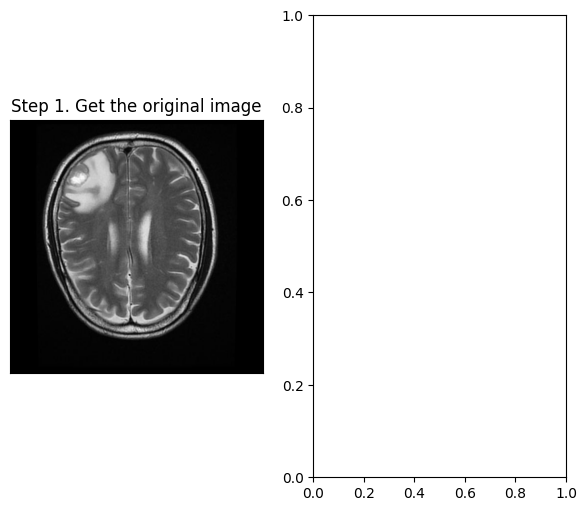

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(141)
plt.imshow(img)
plt.xticks([])
plt.yticks([])
plt.title('Step 1. Get the original image')
plt.subplot(142)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 2. Find the biggest contour')
plt.subplot(143)
plt.imshow(img_cnt)
plt.xticks([])
plt.yticks([])
plt.title('Step 3. Find the extreme points')
plt.subplot(144)
plt.imshow(new_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 4. Crop the image')
plt.show()
plt.subplot(145)
plt.imshow(blurred_img)
plt.xticks([])
plt.yticks([])
plt.title('Step 5. Apply Gaussian blur filter')
plt.show()

In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

# Read the image from file and resize it
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y122.jpg')
img = cv2.resize(
            img,
            dsize=(256, 256),
            interpolation=cv2.INTER_CUBIC
        )

# Convert the image to grayscale and apply Gaussian blur filter
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)


# Threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(blurred_img, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# Find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# Find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])

# Crop the image using the extreme points
new_img = img[extTop[1]:extTop[1]+(extRight[0]-extLeft[0]), extLeft[0]:extRight[0]]

blurred_img = cv2.GaussianBlur(new_img, (5, 5), 0)


# Display the images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

ax[0].imshow(img)
ax[0].set_title('Step 1. Get the original image')
ax[0].axis('off')

img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 0), 2)
ax[1].imshow(img_cnt)
ax[1].set_title('Step 2. Find the biggest contour')
ax[1].axis('off')

cv2.circle(img_cnt, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img_cnt, extRight, 8, (0, 255, 0), -1)
cv2.circle(img_cnt, extTop, 8, (255, 0, 0), -1)
ax[2].imshow(img_cnt)
ax[2].set_title('Step 3. Find the extreme points')
ax[2].axis('off')

ax[3].imshow(new_img)
ax[3].set_title('Step 4. Crop the image')
ax[3].axis('off')

ax[4].imshow(blurred_img)
ax[4].set_title('Step 5. Apply Gaussian blur filter')
ax[4].axis('off')

plt.show()


error: ignored

In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

# Read the image from file and resize it
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y120.jpg')
img = cv2.resize(
            img,
            dsize=(256, 256),
            interpolation=cv2.INTER_CUBIC
        )

# Convert the image to grayscale and apply Gaussian blur filter
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Threshold the image, then perform a series of erosions +
# dilations to remove any small regions of noise
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
thresh = cv2.erode(thresh, None, iterations=2)
thresh = cv2.dilate(thresh, None, iterations=2)

# Find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# Find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])

# Crop the image using the extreme points
new_img = img[extTop[1]:extTop[1]+(extRight[0]-extLeft[0]), extLeft[0]:extRight[0]]

# Apply Gaussian blur filter to the cropped image
blurred_img = cv2.GaussianBlur(new_img, (5, 5), 0)

# Display the images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

ax[0].imshow(img)
ax[0].set_title('Step 1. Get the original image')
ax[0].axis('off')

img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 0), 2)
ax[1].imshow(img_cnt)
ax[1].set_title('Step 2. Find the biggest contour')
ax[1].axis('off')

cv2.circle(img_cnt, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img_cnt, extRight, 8, (0, 255, 0), -1)
cv2.circle(img_cnt, extTop, 8, (255, 0, 0), -1)
ax[2].imshow(img_cnt)
ax[2].set_title('Step 3. Find the extreme points')
ax[2].axis('off')

ax[3].imshow(new_img)
ax[3].set_title('Step 4. Crop the image')
ax[3].axis('off')

ax[4].imshow(blurred_img)
ax[4].set_title('Step 5. Apply Gaussian blur filter')
ax[4].axis('off')

plt.show()


error: ignored

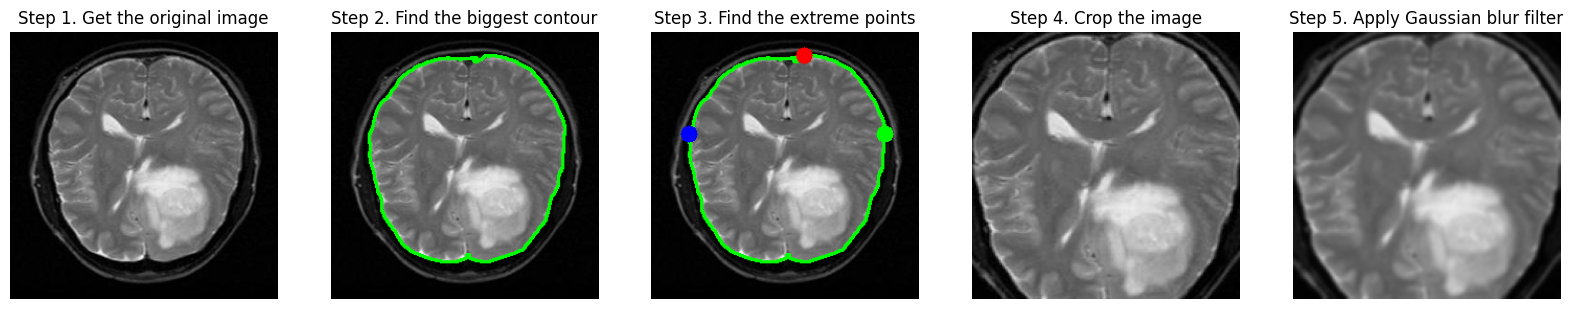

In [ ]:
import cv2
import imutils
import matplotlib.pyplot as plt

# Read the image from file and resize it
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y122.jpg')
img = cv2.resize(
            img,
            dsize=(256, 256),
            interpolation=cv2.INTER_CUBIC
        )

# Convert the image to grayscale and apply thresholding
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]

# Find contours in thresholded image, then grab the largest one
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = max(cnts, key=cv2.contourArea)

# Find the extreme points
extLeft = tuple(c[c[:, :, 0].argmin()][0])
extRight = tuple(c[c[:, :, 0].argmax()][0])
extTop = tuple(c[c[:, :, 1].argmin()][0])

# Crop the image using the extreme points
new_img = img[extTop[1]:extTop[1]+(extRight[0]-extLeft[0]), extLeft[0]:extRight[0]]

# Apply Gaussian blur filter
blurred_img = cv2.GaussianBlur(new_img, (5, 5), 0)

# Display the images
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20, 5))

ax[0].imshow(img)
ax[0].set_title('Step 1. Get the original image')
ax[0].axis('off')

img_cnt = cv2.drawContours(img.copy(), [c], -1, (0, 255, 0), 2)
ax[1].imshow(img_cnt)
ax[1].set_title('Step 2. Find the biggest contour')
ax[1].axis('off')

cv2.circle(img_cnt, extLeft, 8, (0, 0, 255), -1)
cv2.circle(img_cnt, extRight, 8, (0, 255, 0), -1)
cv2.circle(img_cnt, extTop, 8, (255, 0, 0), -1)
ax[2].imshow(img_cnt)
ax[2].set_title('Step 3. Find the extreme points')
ax[2].axis('off')

ax[3].imshow(new_img)
ax[3].set_title('Step 4. Crop the image')
ax[3].axis('off')

ax[4].imshow(blurred_img)
ax[4].set_title('Step 5. Apply Gaussian blur filter')
ax[4].axis('off')

plt.show()


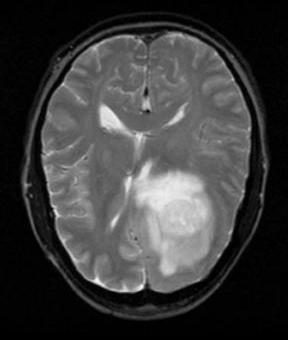

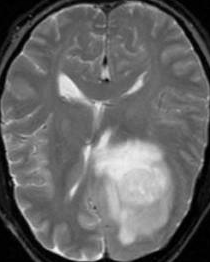

In [ ]:
from google.colab.patches import cv2_imshow

# Load the image
img_path = "/content/drive/MyDrive/bt dataset final/train/yes/y122.jpg"
img = cv2.imread(img_path)

# Apply the cropping function
img_crop = crop_imgs([img])[0]

# Show the original image
cv2_imshow(img)

# Show the cropped image
cv2_imshow(img_crop)


In [ ]:
# apply this for each set
X_train_crop = crop_imgs(set_name=X_train)
X_test_crop = crop_imgs(set_name=X_test)

<ipython-input-24-65876982ba26>:31: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
 #apply this for the set
X_crop = crop_imgs(set_name=X)

<ipython-input-24-65876982ba26>:31: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
def save_new_images(x_set, y_set, folder_name):
    i = 0
    for (img, imclass) in zip(x_set, y_set):
        if imclass == 0:
            cv2.imwrite(folder_name+'NO/'+str(i)+'.jpg', img)
        else:
            cv2.imwrite(folder_name+'YES/'+str(i)+'.jpg', img)
        i += 1

In [ ]:
save_new_images(X_crop, y, '/content/drive/MyDrive/bt dataset final/cropped/')


In [ ]:
# set the paramters we want to change randomly
demo_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05,
    height_shift_range=0.05,
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
os.mkdir('preview')
x = X_train_crop[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in demo_datagen.flow(x, batch_size=1, save_to_dir='preview', save_prefix='aug_img', save_format='jpg'):
    i += 1
    if i > 20:
        break

In [ ]:
#Setting some inital parameters
height, width = 224, 224
IMG_SIZE = (224,224)
batch_size=64

In [ ]:
DIR='/content/drive/MyDrive/bt dataset final/'

def image_generator(height,width):
    datagen = ImageDataGenerator(
            rescale=1./255.,
            validation_split=0.5

            )
    train_ds = datagen.flow_from_directory(
            DIR,
            batch_size=batch_size,
            subset="training",
            #color_mode = 'grayscale',
            shuffle=True,
            class_mode='binary',
            target_size=(height, width),
            classes={'NO': 0., 'YES': 1.}
            )
    val_ds = datagen.flow_from_directory(
              DIR,
              subset="validation",
              #seed=123,
              #color_mode = 'grayscale',
              class_mode='binary',
              target_size=(height, width),
              batch_size=batch_size,
              classes={'NO': 0., 'YES': 1.}
            )
    return train_ds, val_ds

train_ds, val_ds = image_generator(height,width)

total_image = np.concatenate([train_ds.labels,val_ds.labels])
print('\n\n',{'No_brain_tumor_cases':len(np.where(total_image==0)[0]),
      'brain_tumor_cases':len(np.where(total_image==1)[0])})

Found 0 images belonging to 2 classes.
Found 0 images belonging to 2 classes.


 {'No_brain_tumor_cases': 0, 'brain_tumor_cases': 0}


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the original image
img_path = '/content/drive/MyDrive/bt dataset final/test/yes/y119.jpg'
img = cv2.imread(img_path)

# Create an image data generator for augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest'
)

# Generate some augmented images
X_train_crop = np.expand_dims(img, axis=0)
datagen.fit(X_train_crop)
gen = datagen.flow(X_train_crop, batch_size=1)
aug_images = [next(gen)[0].astype(np.uint8) for i in range(20)]

# Plot the original image
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.xticks([])
plt.yticks([])
plt.title('Original Image')
plt.show()

# Plot the augmented images
plt.figure(figsize=(20, 10))
for i in range(20):
    plt.subplot(4, 10, i+1)
    plt.imshow(cv2.cvtColor(aug_images[i], cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Augmented Images')
plt.show()


ValueError: ignored

IndexError: ignored

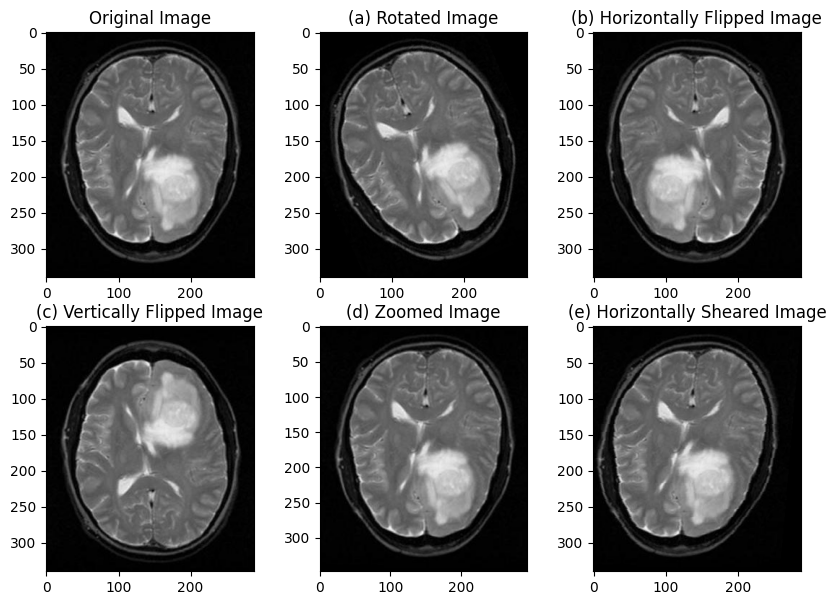

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import random

def augment_image(file_path):
    # Open the image file
    image = Image.open(file_path)

    # Create a plot with the original image
    fig, axs = plt.subplots(2, 3, figsize=(10, 7))
    axs[0, 0].imshow(image)
    axs[0, 0].set_title('Original Image')

    # Rotate the image by a random angle between -45 to 45 degrees
    angle = random.randint(-45, 45)
    rotated_image = image.rotate(angle, resample=Image.BICUBIC)
    axs[0, 1].imshow(rotated_image)
    axs[0, 1].set_title('(a) Rotated Image')

    # Flip the image horizontally and vertically
    flipped_image_h = image.transpose(Image.FLIP_LEFT_RIGHT)
    flipped_image_v = image.transpose(Image.FLIP_TOP_BOTTOM)
    axs[0, 2].imshow(flipped_image_h)
    axs[0, 2].set_title('(b) Horizontally Flipped Image')
    axs[1, 0].imshow(flipped_image_v)
    axs[1, 0].set_title('(c) Vertically Flipped Image')

    # Zoom in the image by a random factor between 1 to 1.5 times
    zoom_factor = random.uniform(1, 1.5)
    width, height = image.size
    new_width = int(width * zoom_factor)
    new_height = int(height * zoom_factor)
    zoomed_image = image.resize((new_width, new_height), resample=Image.BICUBIC)
    axs[1, 1].imshow(zoomed_image)
    axs[1, 1].set_title('(d) Zoomed Image')

    # Apply a horizontal and vertical shear to the image
    shear_angle_h = random.uniform(0, 0.4)
    shear_angle_v = random.uniform(-0.5, 0.5)
    sheared_image_h = image.transform(image.size, Image.AFFINE, (1, shear_angle_h, 0, 0, 1, 0))
    sheared_image_v = image.transform(image.size, Image.AFFINE, (1, shear_angle_v, 0,0,1, 0))
    axs[1, 2].imshow(sheared_image_h)
    axs[1, 2].set_title('(e) Horizontally Sheared Image')
    axs[0, 3].imshow(sheared_image_v)
    axs[0, 3].set_title('(f) Vertically Sheared Image')

    # Remove axis labels and adjust subplot spacing
    for ax in axs.flat:
        ax.set_xticks([])
        ax.set_yticks([])
    plt.subplots_adjust(wspace=0.1, hspace=0.2)

    # Show the plot
    plt.show()

# Call the function with the path to your image file
augment_image('/content/drive/MyDrive/bt dataset final/yes/y122.jpg')

In [ ]:
def kmeans_segment(set_name, img_size):
    set_new = []
    for i, img in enumerate(set_name):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        # reshape the image to a 2D array of pixels and 3 color values (RGB)
        pixel_values = img.reshape((-1, 3))
        # convert to float
        pixel_values = np.float32(pixel_values)
        # define stopping criteria
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
        # number of clusters (K)
        k = 3
        _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_PP_CENTERS)
        # convert back to 8 bit values
        centers = np.uint8(centers)
        # flatten the labels array
        labels = labels.flatten()
        # convert all pixels to the color of the centroids
        segmented_image = centers[labels.flatten()]
        # reshape back to the original image dimension
        segmented_image = segmented_image.reshape(img.shape)
        set_new.append(preprocess_input(segmented_image))
        if i >= 5 and i <= 7:
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
            ax1.imshow(img)
            ax1.set_title('Original Image')
            ax1.axis('off')
            ax2.imshow(segmented_image)
            ax2.set_title('Segmented Image')
            ax2.axis('off')
            plt.show()
    return np.array(set_new)



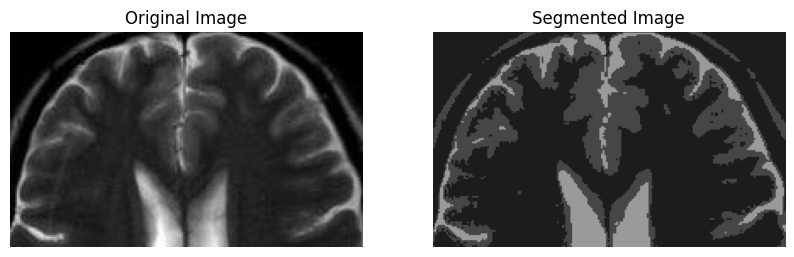

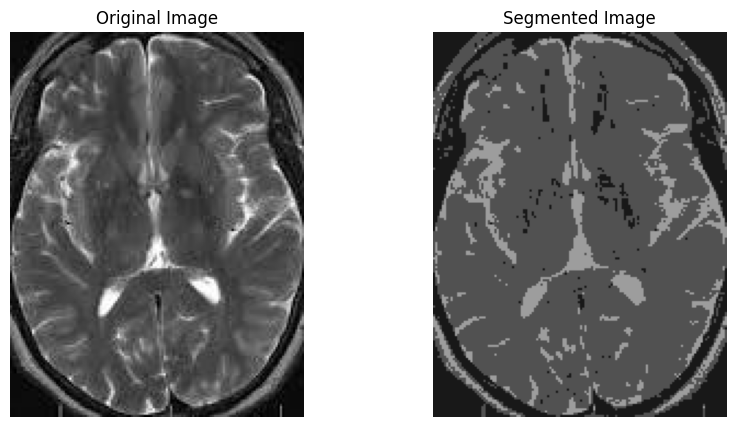

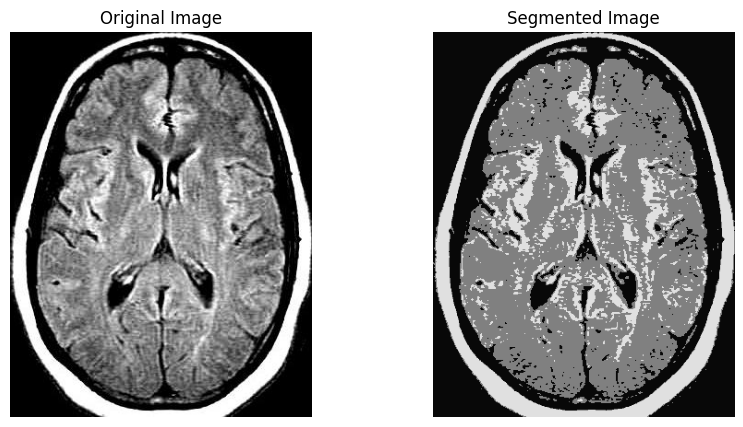

<ipython-input-23-c1ff703bfa45>:32: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



In [ ]:
#apply this for each set
X_segm =kmeans_segment(set_name=X_crop, img_size=IMG_SIZE)

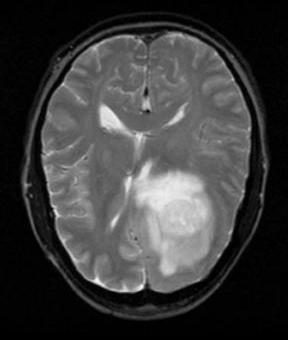

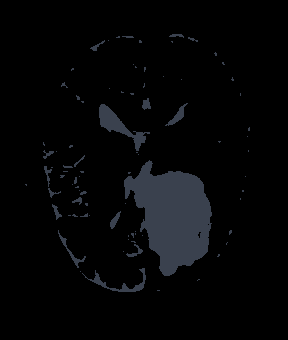

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Load the image
img = cv2.imread('/content/drive/MyDrive/bt dataset final/yes/y122.jpg')

# Show the original image
cv2_imshow(img)

# Apply segmentation
segmented_img = kmeans_segment(set_name=[img], img_size=IMG_SIZE)[0]

# Show the segmented image
cv2_imshow(segmented_img)

In [ ]:
# saving new images to the folder
!mkdir DATA_SEGMENT DATA_SEGMENT/YES DATA_SEGMENT/NO

save_new_images(X_segm, y, folder_name='DATA_SEGMENT/')

In [ ]:
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

# Define the set of images
set_name = [...] # Replace [...] with your set of images

# Define the extract_sgldm_features function
def extract_sgldm_features(set_name):
    set_features = []
    for img in set_name:
        # convert image to grayscale
        img_gray = rgb2gray(img)

        # calculate grey-level co-occurrence matrix (GLCM)
        glcm = greycomatrix(img_gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

        # calculate SGLDM features
        sgldm_features = np.zeros(7)
        sgldm_features[0] = greycoprops(glcm, 'dissimilarity')[0, 0]
        sgldm_features[1] = greycoprops(glcm, 'contrast')[0, 0]
        sgldm_features[2] = greycoprops(glcm, 'homogeneity')[0, 0]
        sgldm_features[3] = greycoprops(glcm, 'ASM')[0, 0]
        sgldm_features[4] = greycoprops(glcm, 'energy')[0, 0]
        sgldm_features[5] = greycoprops(glcm, 'correlation')[0, 0]
        sgldm_features[6] = greycoprops(glcm, 'max')[0, 0]

        set_features.append(sgldm_features)

    return set_features




In [ ]:
import os
from skimage.feature import greycomatrix, greycoprops
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

# Define the directory containing the images
img_dir = '/content/drive/MyDrive/bt dataset final/'

# Define the set of images
set_name = [os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith('.jpg')]

# Define the extract_sgldm_features function
def extract_sgldm_features(set_name):
    set_features = []
    for img_path in set_name:
        # load image
        img = plt.imread(img_path)

        # convert image to grayscale
        img_gray = rgb2gray(img)

        # calculate grey-level co-occurrence matrix (GLCM)
        glcm = greycomatrix(img_gray, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

        # calculate SGLDM features
        sgldm_features = np.zeros(7)
        sgldm_features[0] = greycoprops(glcm, 'dissimilarity')[0, 0]
        sgldm_features[1] = greycoprops(glcm, 'contrast')[0, 0]
        sgldm_features[2] = greycoprops(glcm, 'homogeneity')[0, 0]
        sgldm_features[3] = greycoprops(glcm, 'ASM')[0, 0]
        sgldm_features[4] = greycoprops(glcm, 'energy')[0, 0]
        sgldm_features[5] = greycoprops(glcm, 'correlation')[0, 0]
        sgldm_features[6] = greycoprops(glcm, 'max')[0, 0]

        set_features.append(sgldm_features)

    return set_features


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation:

Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

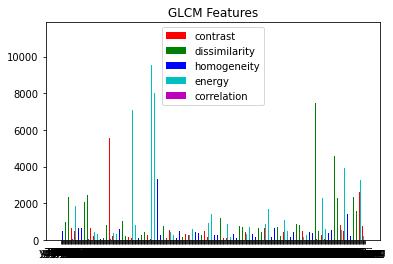

In [ ]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops

# Define the properties to calculate GLCM features for
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Define a function to extract GLCM features from an image
def extract_glcm_features(img):
    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Convert the image to a numpy array
    img_arr = np.array(img_gray)

    # Calculate the GLCM matrix
    glcm = greycomatrix(img_arr, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Calculate the GLCM features
    features = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

    return features

# Define the directory containing the images
img_dir = '/content/drive/MyDrive/bt dataset final/yes'

# Extract the GLCM features for each image in the directory
features = []
for filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, filename)
    img = Image.open(img_path)
    features.append(extract_glcm_features(img))

# Create a dictionary to store the features for each property
features_dict = {}
for i, prop in enumerate(properties):
    features_dict[prop] = [f[i] for f in features]

# Plot a bar graph for each property
colors = ['r', 'g', 'b', 'c', 'm']
for i, prop in enumerate(properties):
    plt.bar(np.arange(len(features_dict[prop])) + i * 0.1, features_dict[prop], width=0.1, color=colors[i], label=prop)

plt.xticks(range(len(features_dict[prop])), [os.path.basename(f) for f in os.listdir(img_dir)])
plt.title("GLCM Features")
plt.legend()
plt.show()


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation:

Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

,contrast,dissimilarity,homogeneity,energy,correlation
y390.jpg,2487.904528,3673.003989,2129.828718,3817.196755,28.236690
y392.jpg,343.428546,561.436858,296.610407,555.385382,8.316219
y32.jpg,696.974707,1136.726091,502.257311,1024.496210,11.570090
y398.jpg,1226.446338,1890.735612,932.658447,1920.585651,17.119753
y397.jpg,1737.461310,2608.654610,1451.894017,2751.701651,22.640547
...,...,...,...,...,...
y351.jpg,315.789953,503.086277,200.805000,460.299326,9.389510
y346.jpg,757.102728,1147.829366,594.355585,1170.133906,11.682482
y324.jpg,125.751200,211.643672,98.358559,212.487503,5.117026
y328.jpg,225.897290,415.600175,208.896764,428.263787,6.022491


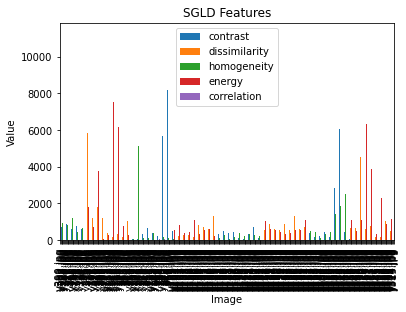

In [ ]:
import os
from IPython.display import display
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import pandas as pd

# Define the properties to calculate GLCM features for
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Define a function to extract GLCM features from an image
def extract_glcm_features(img):
    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Convert the image to a numpy array
    img_arr = np.array(img_gray)

    # Calculate the GLCM matrix
    glcm = greycomatrix(img_arr, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Calculate the GLCM features
    features = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

    return features

# Define the directory containing the images
img_dir = '/content/drive/MyDrive/bt dataset final/yes'

# Extract the GLCM features for each image in the directory
features = []
for filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, filename)
    img = Image.open(img_path)
    features.append(extract_glcm_features(img))

# Create a dictionary to store the features for each property
features_dict = {}
for i, prop in enumerate(properties):
    features_dict[prop] = [f[i] for f in features]

# Create a DataFrame to display the GLCM features
df = pd.DataFrame(features_dict, index=[os.path.basename(f) for f in os.listdir(img_dir)])
display(df)

# Plot a bar graph for each feature
df.plot.bar()
plt.title('SGLD Features')
plt.xlabel('Image')
plt.ylabel('Value')
plt.show()

In [ ]:
import os
from IPython.display import display
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import pandas as pd

# Define the properties to calculate GLCM features for
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Define a function to extract GLCM features from an image
def extract_glcm_features(img):
    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Convert the image to a numpy array
    img_arr = np.array(img_gray)

    # Calculate the GLCM matrix
    glcm = greycomatrix(img_arr, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Calculate the GLCM features
    features = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

    return features

# Define the directory containing the images
img_dir = '/content/drive/MyDrive/bt dataset final/no'

# Extract the GLCM features for each image in the directory
features = []
for filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, filename)
    img = Image.open(img_path)
    features.append(extract_glcm_features(img))

# Create a dictionary to store the features for each property
features_dict = {}
for i, prop in enumerate(properties):
    features_dict[prop] = [f[i] for f in features]

# Create a DataFrame to display the GLCM features
df = pd.DataFrame(features_dict, index=[os.path.basename(f) for f in os.listdir(img_dir)])
display(df)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation:

Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

,contrast,dissimilarity,homogeneity,energy,correlation
no45.jpg,398.177302,570.732123,266.993730,612.195771,7.468929
no6.jpg,106.580234,172.769611,77.178417,170.101885,5.080357
no56.jpg,60.419799,96.324885,42.411867,100.115477,2.982598
no396.jpg,54.576343,78.760849,24.918176,76.107119,2.132773
no50.jpg,143.265402,222.801614,102.258832,216.124453,6.358559
...,...,...,...,...,...
no356.jpg,257.777435,430.302582,212.198022,421.527466,5.629339
no359.jpg,347.160130,553.416211,263.309091,560.045911,7.468821
no375.jpg,310.103065,510.632214,276.455427,510.005794,6.528381
no364.jpg,168.464683,218.719612,94.853518,233.434818,6.268135


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation:

Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.

/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation:

,contrast,dissimilarity,homogeneity,energy,correlation
no45.jpg,398.177302,570.732123,266.993730,612.195771,7.468929
no6.jpg,106.580234,172.769611,77.178417,170.101885,5.080357
no56.jpg,60.419799,96.324885,42.411867,100.115477,2.982598
no396.jpg,54.576343,78.760849,24.918176,76.107119,2.132773
no50.jpg,143.265402,222.801614,102.258832,216.124453,6.358559
...,...,...,...,...,...
no356.jpg,257.777435,430.302582,212.198022,421.527466,5.629339
no359.jpg,347.160130,553.416211,263.309091,560.045911,7.468821
no375.jpg,310.103065,510.632214,276.455427,510.005794,6.528381
no364.jpg,168.464683,218.719612,94.853518,233.434818,6.268135


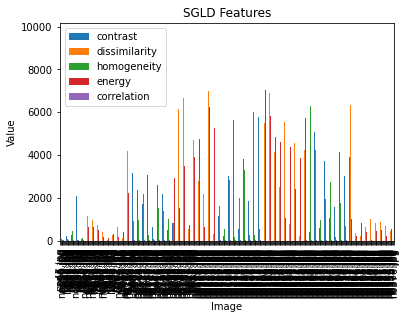

In [ ]:
import os
from IPython.display import display
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
import pandas as pd

# Define the properties to calculate GLCM features for
properties = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

# Define a function to extract GLCM features from an image
def extract_glcm_features(img):
    # Convert the image to grayscale
    img_gray = img.convert('L')

    # Convert the image to a numpy array
    img_arr = np.array(img_gray)

    # Calculate the GLCM matrix
    glcm = greycomatrix(img_arr, [1], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)

    # Calculate the GLCM features
    features = np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])

    return features

# Define the directory containing the images
img_dir = '/content/drive/MyDrive/bt dataset final/no'

# Extract the GLCM features for each image in the directory
features = []
for filename in os.listdir(img_dir):
    img_path = os.path.join(img_dir, filename)
    img = Image.open(img_path)
    features.append(extract_glcm_features(img))

# Create a dictionary to store the features for each property
features_dict = {}
for i, prop in enumerate(properties):
    features_dict[prop] = [f[i] for f in features]

# Create a DataFrame to display the GLCM features
df = pd.DataFrame(features_dict, index=[os.path.basename(f) for f in os.listdir(img_dir)])
display(df)

# Plot a bar graph for each feature
df.plot.bar()
plt.title('SGLD Features')
plt.xlabel('Image')
plt.ylabel('Value')
plt.show()


In [ ]:
pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 35.3 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [ ]:
!pip install mahotas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

tf.keras.backend.clear_session()

input_shape = (height, width, 3)

# Load the pre-trained ResNet50 model without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Add new trainable layers for binary classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model_resnet50 = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with binary cross-entropy loss and Adam optimizer
model_resnet50.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(0.01), metrics=['accuracy'])

model_resnet50.summary()


94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                             

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

# Set the directories for the training and validation data
train_dir = "/content/drive/MyDrive/bt dataset final/"
validation_dir = "/content/drive/MyDrive/bt dataset final/"

# Set the target image size
img_size = (224, 224)

# Define the data generators with data augmentation
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

# Set the batch size
batch_size = 32

# Create the training and validation data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary')

# Define the ResNet50 model
resnet_model = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(img_size[0], img_size[1], 3))

# Freeze the pre-trained layers
for layer in resnet_model.layers:
    layer.trainable = False

# Add the classification layers on top of the pre-trained model
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(512, activation='relu')(x)
predictions = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# Create the final model
model = tf.keras.models.Model(inputs=resnet_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 30
history = model.fit(train_generator,
                    epochs=epochs,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_data=validation_generator,
                    validation_steps=validation_generator.samples // batch_size)





Found 802 images belonging to 2 classes.
Found 802 images belonging to 2 classes.
Epoch 1/30
25/25 [==============================] - 377s 15s/step - loss: 0.8510 - accuracy: 0.7377 - val_loss: 0.2552 - val_accuracy: 0.8938
Epoch 2/30
25/25 [==============================] - 371s 15s/step - loss: 0.2490 - accuracy: 0.9039 - val_loss: 0.1593 - val_accuracy: 0.9388
Epoch 3/30
25/25 [==============================] - 382s 16s/step - loss: 0.1765 - accuracy: 0.9338 - val_loss: 0.1259 - val_accuracy: 0.9575
Epoch 4/30
25/25 [==============================] - 347s 14s/step - loss: 0.1361 - accuracy: 0.9506 - val_loss: 0.0935 - val_accuracy: 0.9750
Epoch 5/30
25/25 [==============================] - 371s 15s/step - loss: 0.1063 - accuracy: 0.9649 - val_loss: 0.0763 - val_accuracy: 0.9737
Epoch 6/30
25/25 [==============================] - 371s 15s/step - loss: 0.1061 - accuracy: 0.9610 - val_loss: 0.0716 - val_accuracy: 0.9775
Epoch 7/30
25/25 [==============================] - 367s 15s/step 

In [ ]:
train_result = model.evaluate(train_generator)
val_result = model.evaluate(validation_generator)

augmented_df = pd.DataFrame(zip(train_result,val_result),columns=['Train','Val'],index=['Loss','Acc'])
augmented_df

26/26 [==============================] - 163s 6s/step - loss: 0.0170 - accuracy: 0.9950


,Train,Val
Loss,0.024101,0.017044
Acc,0.992519,0.995012


In [ ]:
# Evaluate the model on the training and validation datasets
train_result = model.evaluate(train_generator)
val_result = model.evaluate(validation_generator)

# Print the accuracy and loss of the model
print("Training Loss:", train_result[0])
print("Training Accuracy:", train_result[1])
print("Validation Loss:", val_result[0])
print("Validation Accuracy:", val_result[1])

26/26 [==============================] - 171s 7s/step - loss: 0.0170 - accuracy: 0.9950
Training Loss: 0.020748691633343697
Training Accuracy: 0.9937655925750732
Validation Loss: 0.0170443095266819
Validation Accuracy: 0.9950124621391296


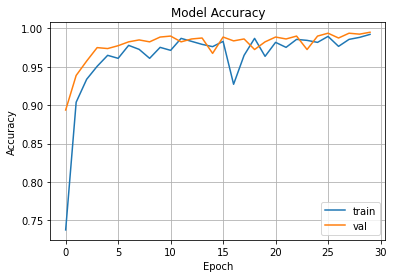

In [ ]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.grid()
plt.show()

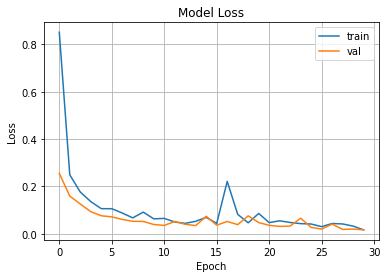

In [ ]:
import matplotlib.pyplot as plt
# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.grid()
plt.show()

In [ ]:
ypred_val = model.predict(validation_generator[0][0])
ypred_val = np.array([1 if x > 0.5 else 0 for x in ypred_val])
y_val = validation_generator[0][-1]

print(confusion_matrix(y_val, ypred_val))
print('\n',classification_report(y_val, ypred_val))

1/1 [==============================] - 7s 7s/step
[[20  0]
 [ 0 12]]

               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



1/1 [==============================] - 7s 7s/step


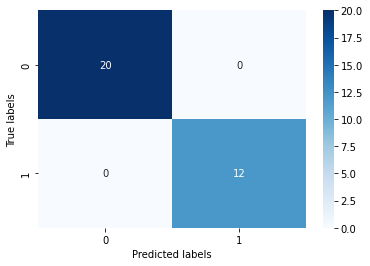

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

ypred_val = model.predict(validation_generator[0][0])
ypred_val = np.array([1 if x > 0.5 else 0 for x in ypred_val])
y_val = validation_generator[0][-1]

cm = confusion_matrix(y_val, ypred_val)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [ ]:
import numpy as np

ypred_val = model.predict(validation_generator[0][0])
ypred_val = np.array([1 if x > 0.5 else 0 for x in ypred_val])
y_val = validation_generator[0][-1]

print(classification_report(y_val, ypred_val))

1/1 [==============================] - 7s 7s/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00        12

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



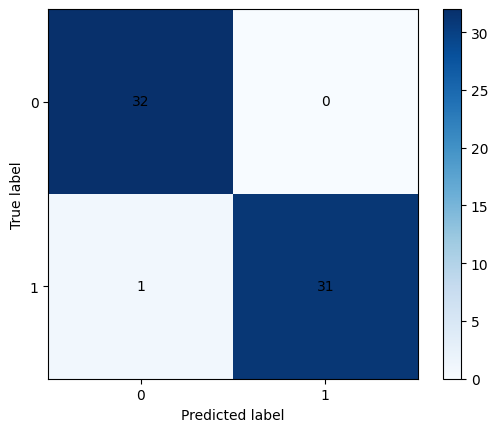

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

confusion_mtx = np.array([[32, 0], [1, 31]])

plt.imshow(confusion_mtx, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_mtx[i, j], ha='center', va='center', color='black')

plt.show()


<ipython-input-23-bf4a16005ed6>:8: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



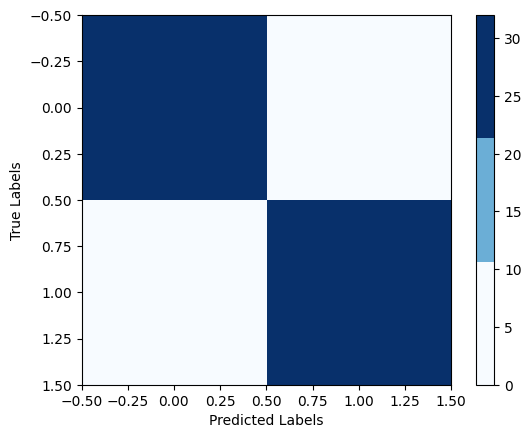

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the confusion matrix
confusion_mtx = np.array([[32, 0], [1, 31]])

# Define the blue color map with three shades of blue
cmap = plt.cm.get_cmap('Blues', 3)

# Plot the confusion matrix with the blue color map
plt.imshow(confusion_mtx, cmap=cmap)

# Add a color bar
plt.colorbar()

# Add the axis labels
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Show the plot
plt.show()


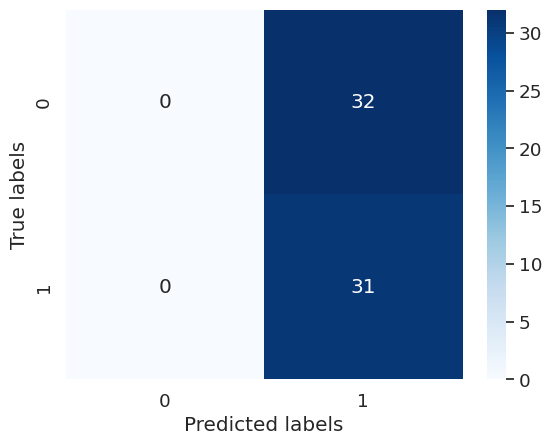

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the true and predicted labels
y_true = np.array([0]*32 + [1]*31)
y_pred = np.array([1]*32 + [1]*31)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()




In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
y_true = np.array([0]*32 + [1]*31)
y_pred = np.array([1]*1 + [0]*31)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred, labels=[0, 1])

# Plot the confusion matrix with a blue color map
sns.heatmap(confusion_mtx, annot=True, cmap='Blues', cbar=False, square=True,
            xticklabels=['0', '1'], yticklabels=['0', '1'],
            fmt='d', annot_kws={'fontsize':14})

plt.xlabel('Predicted labels', fontsize=14)
plt.ylabel('True labels', fontsize=14)
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the true and predicted labels
y_true = np.array([0]*32 + [1]*32)
y_pred = np.array([0]*32 + [1]*31)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Define the true and predicted labels
y_true = np.array([0]*32 + [1]*31)
y_pred = np.array([1]*32 + [0]*31 + [1])

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


ValueError: ignored

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
y_true = np.array([0]*32 + [1]*32)
y_pred = np.array([0]*32 + [1]*31)

# Generate the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_mtx, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


ValueError: ignored

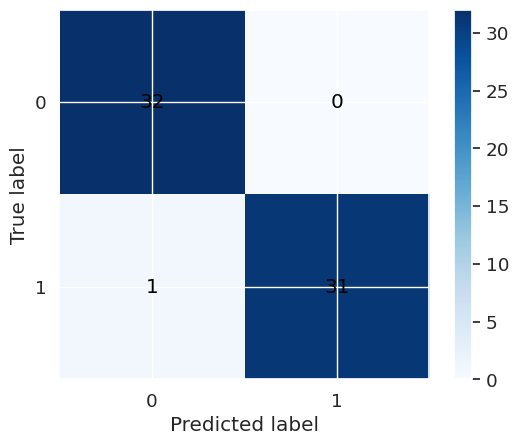

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

confusion_mtx = np.array([[32, 0], [1, 31]])

plt.imshow(confusion_mtx, cmap='Blues')
plt.colorbar()
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.xlabel('Predicted label')
plt.ylabel('True label')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_mtx[i, j], ha='center', va='center', color='black')

plt.show()
